In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['agg.path.chunksize'] = 10000

plt.style.use('dark_background')

plt.rcParams.update({"figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

%matplotlib inline

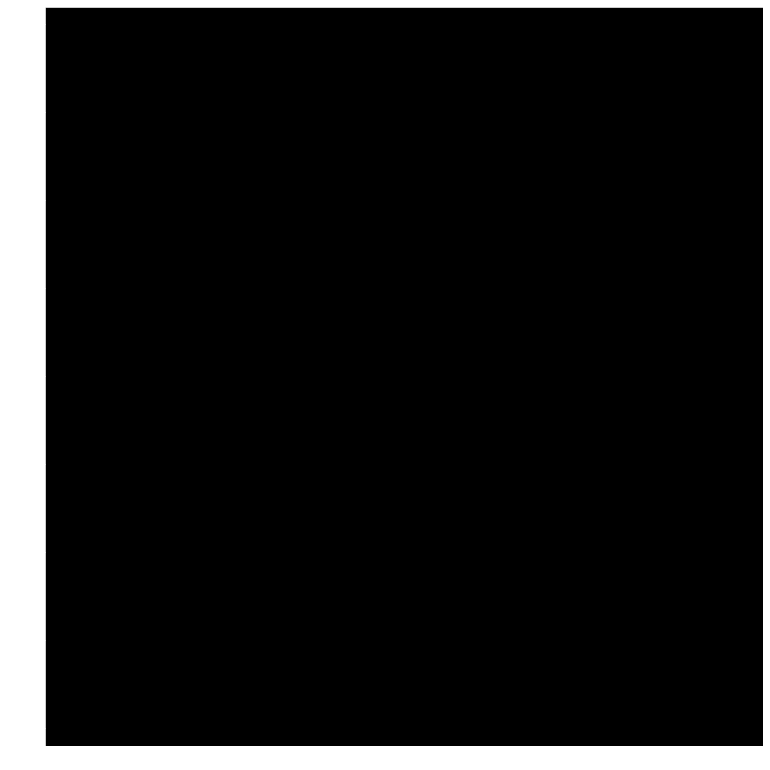

In [52]:
rmax = 10
n_circles = 50

radii = np.linspace(rmax*rmax,0,n_circles,endpoint=False)
radii = np.sqrt(radii)
fig = plt.figure(figsize=(10.8,10.8))
ax = plt.gca()
ax.set_xlim([-1.05*rmax,1.05*rmax])
ax.set_ylim([-1.05*rmax,1.05*rmax])

for radius in radii:
    circ = mpl.patches.Circle([0,0],radius,lw=0,fill=False)
    ax.add_patch(circ)

fig.tight_layout()
plt.show()

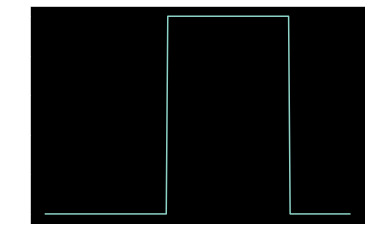

In [46]:
def box_function(x,xmin,xmax):
    
    return np.heaviside(x-xmin,0.5)*np.heaviside(xmax-x,0.5)

Xs = np.linspace(-5,5,200)
plt.plot(Xs,box_function(Xs,-1,3))

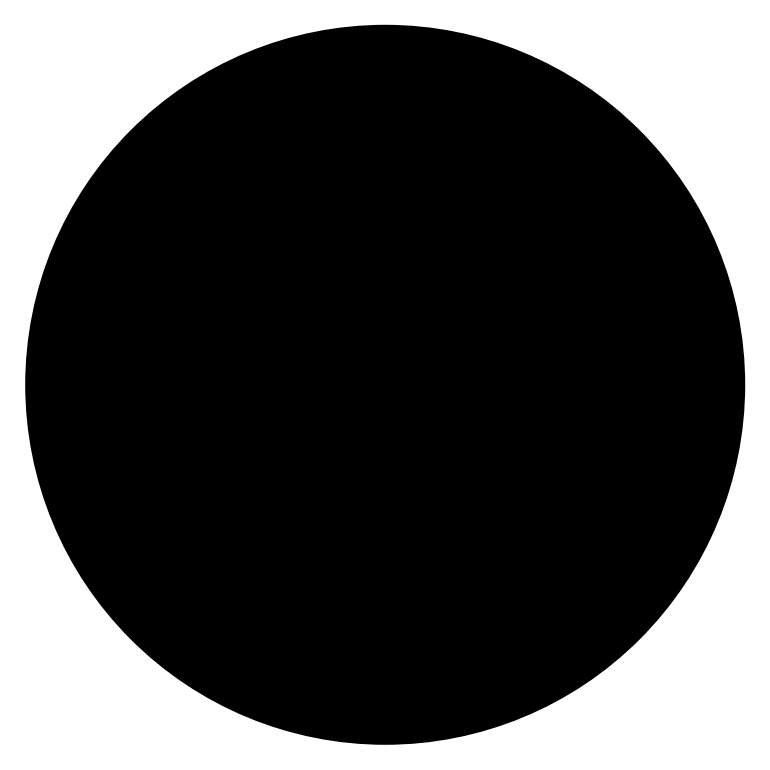

In [66]:
rmax = 10
n_circles = 30
omega = np.pi
wavelength = 2
wave_speed = 1
wavenumber = wave_speed/wavelength
t_wave_end = 4

n_colors = 6

max_phase = omega*t_wave_end

t_end = (max_phase + wavenumber*1.1*rmax)/omega

n_frames = int(60*t_end)



Ts = np.linspace(0,t_end,n_frames,endpoint=False)

radii = np.linspace(rmax*rmax,0,n_circles,endpoint=False)
radii = np.sqrt(radii)
amplitudes = radii[:-1]/radii[1:]
amplitudes = np.append(amplitudes,amplitudes[-1])

fig = plt.figure(figsize=(10.8,10.8))
ax = plt.gca()
ax.set_xlim([-1.05*rmax,1.05*rmax])
ax.set_ylim([-1.05*rmax,1.05*rmax])

color_bins = np.linspace(1,0,n_colors+1)
color_array = np.array([mpl.colors.hsv_to_rgb([336/360,0.47,0.75*v]) for v in color_bins])

for frame, t in enumerate(Ts):

    ax.cla()
    ax.set_xlim([-1.05*rmax,1.05*rmax])
    ax.set_ylim([-1.05*rmax,1.05*rmax])

    for radius, amplitude in zip(radii,amplitudes):
        
        phase = omega*t - wavenumber*radius
        
        wave_multiplier = (np.sin(phase)**6)*box_function(phase,0,max_phase)
        
        r = radius + 0.5*amplitude*wave_multiplier
        
        digitized_color = color_array[np.digitize(wave_multiplier,color_bins)]
        
        circ = mpl.patches.Circle([0,0],r,ec='w',lw=0,fc=digitized_color)
        
        ax.add_patch(circ)

    ax.axis('off')
    fig.tight_layout()
    fig.savefig("animation/nested-circles%04d.png"%frame,dpi=100)
    print('Frame',frame+1,'of',n_frames,end='\r')
    
plt.show()